## UBER & LYFT CAB PRICES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# cab rides dataset
df_r = pd.read_csv('cab_rides.csv')

# weather dataset
df_w  = pd.read_csv('weather.csv')

In [3]:
df_r.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
df_w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
df_r.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

## DATA PREPROCESSING

## Unifing timestamp format and turn to datetime

In [6]:
df_r['date_time'] = pd.to_datetime(df_r['time_stamp']/1000, unit='s')
df_w['date_time'] = pd.to_datetime(df_w['time_stamp'], unit='s')

In [7]:
df_r['date_time']

0        2018-12-16 09:30:07.890000105
1        2018-11-27 02:00:23.677000046
2        2018-11-28 01:00:22.197999954
3        2018-11-30 04:53:02.749000072
4        2018-11-29 03:49:20.223000050
                      ...             
693066   2018-12-01 23:53:05.533999919
693067   2018-12-01 23:53:05.533999919
693068   2018-12-01 23:53:05.533999919
693069   2018-12-01 23:53:05.533999919
693070   2018-12-01 23:53:05.533999919
Name: date_time, Length: 693071, dtype: datetime64[ns]

## Merging info location-date-hour wise

In [8]:

df_r['loc_date_hr'] = df_r['source'].astype(str) + " - " + df_r['date_time'].dt.date.astype(str) + " - " + df_r['date_time'].dt.hour.astype(str)
df_w['loc_date_hr'] = df_w['location'].astype(str) + " - " + df_w['date_time'].dt.date.astype(str) + " - " + df_w['date_time'].dt.hour.astype(str)

In [9]:
df_w

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,loc_date_hr
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,Back Bay - 2018-12-16 - 23
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,Beacon Hill - 2018-12-16 - 23
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,Boston University - 2018-12-16 - 23
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,Fenway - 2018-12-16 - 23
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,Financial District - 2018-12-16 - 23
...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,2018-12-03 06:52:54,North Station - 2018-12-03 - 6
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,Northeastern University - 2018-12-03 - 6
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,South Station - 2018-12-03 - 6
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,Theatre District - 2018-12-03 - 6


## Grouping the weather by the location and datetime and updating corresponding parameters with mean value.

In [10]:

weather = df_w.groupby(['loc_date_hr']).agg({'temp': 'mean', 'clouds': 'mean', 'pressure': 'mean', 'rain': 'mean', 'humidity': 'mean', 'wind': 'mean'}).reset_index()
weather['location'] = df_w.groupby(['loc_date_hr'])['location'].first().values
weather.index = weather['loc_date_hr']
weather['rain'].fillna(0,inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_30964\2307211334.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['rain'].fillna(0,inplace=True)


In [11]:
#Merging the both dataset into one using on 'loc_date_hr'
merged_df = df_r.join(weather,on=['loc_date_hr'],rsuffix ='_w')
merged_df.dropna(inplace=True)

In [12]:
merged_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,loc_date_hr,loc_date_hr_w,temp,clouds,pressure,rain,humidity,wind,location
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,Haymarket Square - 2018-12-16 - 9,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,Haymarket Square
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,Haymarket Square
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,Haymarket Square - 2018-11-30 - 4,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,Haymarket Square
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,Haymarket Square - 2018-11-29 - 3,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,Haymarket Square
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,2018-12-17 18:25:12.138000011,Haymarket Square - 2018-12-17 - 18,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.15,0.000,0.790000,7.55,Haymarket Square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,West End
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,West End
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,West End
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,West End


In [13]:
merged_df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date_time           0
loc_date_hr         0
loc_date_hr_w       0
temp                0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
location            0
dtype: int64

In [14]:
#getting hour as separate feature
merged_df['hour'] = merged_df['date_time'].dt.hour.astype(int)
def categorize_time(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 22:
        return 'Night'
    elif hour == 23 or hour == 0 or hour == 1:
        return 'Late Night'
    elif 2 <= hour <= 5:
        return 'Late Night'

merged_df['day_time'] = merged_df['hour'].apply(categorize_time)

In [15]:
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,loc_date_hr_w,temp,clouds,pressure,rain,humidity,wind,location,hour,day_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,Haymarket Square,9,Morning
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,Haymarket Square,2,Late Night
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,Haymarket Square,4,Late Night
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,Haymarket Square,3,Late Night
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,...,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.15,0.000,0.790000,7.55,Haymarket Square,18,Night


In [16]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          635242 non-null  float64       
 1   cab_type          635242 non-null  object        
 2   time_stamp        635242 non-null  int64         
 3   destination       635242 non-null  object        
 4   source            635242 non-null  object        
 5   price             635242 non-null  float64       
 6   surge_multiplier  635242 non-null  float64       
 7   id                635242 non-null  object        
 8   product_id        635242 non-null  object        
 9   name              635242 non-null  object        
 10  date_time         635242 non-null  datetime64[ns]
 11  loc_date_hr       635242 non-null  object        
 12  loc_date_hr_w     635242 non-null  object        
 13  temp              635242 non-null  float64       
 14  clouds   

### This information tells it does not contain any nulls and missing values.

In [17]:
merged_df.drop(columns=['id','product_id','time_stamp','location','date_time','loc_date_hr','loc_date_hr_w','hour'],axis=1,inplace=True)


In [18]:
merged_df.head()


,distance,cab_type,destination,source,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,day_time
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.460,0.290000,1022.25,0.000,0.760000,7.68,Morning
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,44.065,0.995000,1002.88,0.106,0.895000,12.63,Late Night
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,35.080,0.000000,1013.71,0.000,0.700000,5.25,Late Night
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.680,0.433333,998.42,0.000,0.706667,11.16,Late Night
5,0.44,Lyft,North Station,Haymarket Square,16.5,1.0,Lux Black,40.780,0.930000,1000.15,0.000,0.790000,7.55,Night


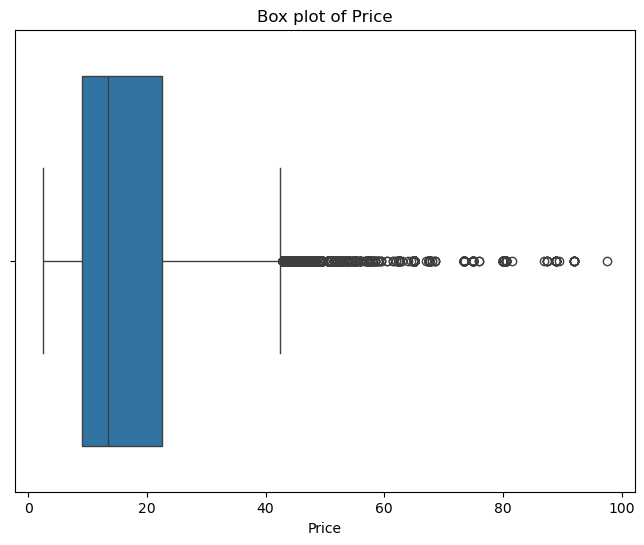

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot to visualize the distribution of the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()


### From the box plot, we can conclude that most ride prices are relatively low, with a few rides being significantly more expensive, indicative of outliers or premium pricing.

In [20]:
# Calculate the first and third quartiles
Q1 = merged_df['price'].quantile(0.25)
Q3 = merged_df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_df = merged_df[(merged_df['price'] >= lower_bound) & (merged_df['price'] <= upper_bound)]

# Display the filtered DataFrame without outliers
print("Original DataFrame shape:", merged_df.shape)
print("Filtered DataFrame shape (without outliers):", filtered_df.shape)


Original DataFrame shape: (635242, 14)
Filtered DataFrame shape (without outliers): (629676, 14)


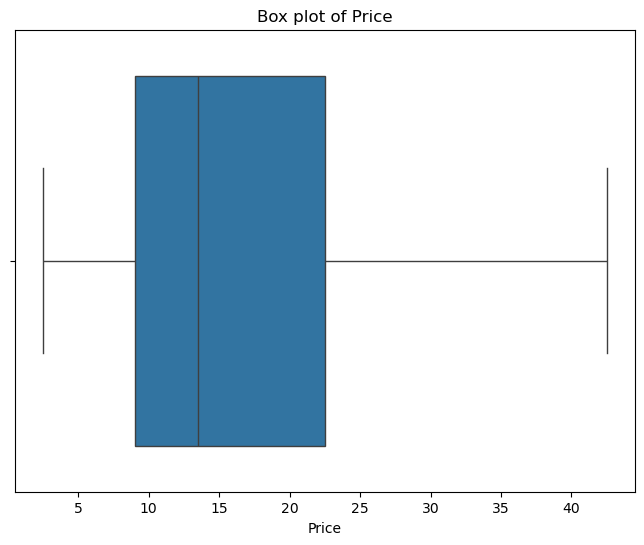

In [21]:
# Creating a box plot to visualize the distribution of the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_30964\1106421973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tg_dt.index, y=tg_dt.values, palette='viridis')


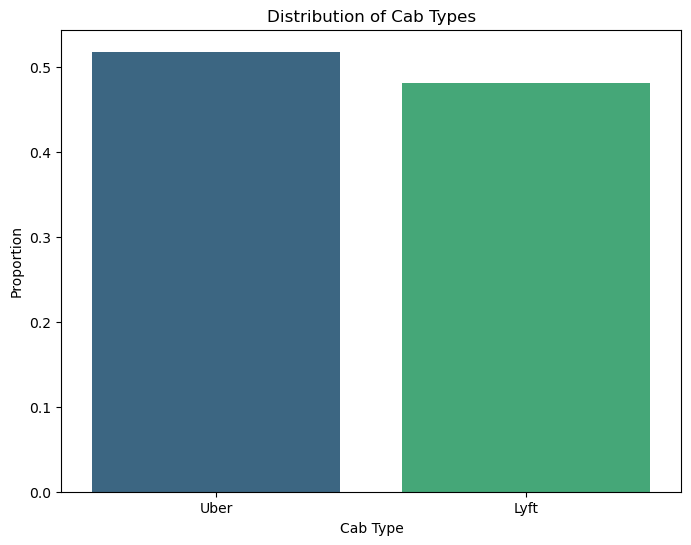

Percentage of Uber rides: 51.81
Percentage of Lyft rides: 48.19


In [22]:
# Check the distribution of the target variable
tg_dt = merged_df['cab_type'].value_counts(normalize=True)

# Plot 
plt.figure(figsize=(8, 6))
sns.barplot(x=tg_dt.index, y=tg_dt.values, palette='viridis')
plt.title('Distribution of Cab Types')
plt.xlabel('Cab Type')
plt.ylabel('Proportion')
plt.show()

# Print the distribution percentages
print("Percentage of Uber rides:", round(tg_dt['Uber'] * 100, 2))
print("Percentage of Lyft rides:", round(tg_dt['Lyft'] * 100, 2))


### 
The bar chart displays the proportion of rides for Uber and Lyft. Both bars are quite similar in height, suggesting a balanced distribution between the two cab types. There doesn't appear to be a significant imbalance issue based on this visualization; the proportions of Uber and Lyft rides in the dataset are almost equal.

In [63]:
X_lyft.head()


,cab_type,destination,source,name,day_time,temp
0,Lyft,North Station,Haymarket Square,Shared,Morning,38.460
1,Lyft,North Station,Haymarket Square,Lux,Late Night,44.065
3,Lyft,North Station,Haymarket Square,Lux Black XL,Late Night,35.080
4,Lyft,North Station,Haymarket Square,Lyft XL,Late Night,37.680
5,Lyft,North Station,Haymarket Square,Lux Black,Night,40.780


# Temperature Impact on Uber and Lyft datasets

In [72]:
# Step 1: Create a new DataFrame with relevant columns
weather_impact = merged_df[['cab_type', 'destination', 'source', 'name', 'day_time','price', 'temp']].copy()

# Step 2: Separate the data into Uber and Lyft datasets
uber_weather = weather_impact[weather_impact_df['cab_type'] == 'Uber'].copy()
lyft_weather = weather_impact[weather_impact_df['cab_type'] == 'Lyft'].copy()

In [65]:
weather_impact_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cab_type     635242 non-null  object 
 1   destination  635242 non-null  object 
 2   source       635242 non-null  object 
 3   name         635242 non-null  object 
 4   day_time     635242 non-null  object 
 5   price        635242 non-null  float64
 6   rain         635242 non-null  float64
dtypes: float64(2), object(5)
memory usage: 38.8+ MB


In [66]:
uber_weather


,cab_type,destination,source,name,day_time,price,rain
12,Uber,West End,North End,UberXL,Night,12.0,0.0000
13,Uber,West End,North End,Black,Morning,16.0,0.0000
14,Uber,West End,North End,UberX,Night,7.5,0.0000
15,Uber,West End,North End,WAV,Late Night,7.5,0.2088
16,Uber,West End,North End,Black SUV,Late Night,26.0,0.0000
...,...,...,...,...,...,...,...
693065,Uber,North End,West End,WAV,Late Night,9.5,0.0000
693066,Uber,North End,West End,UberXL,Late Night,13.0,0.0000
693067,Uber,North End,West End,UberX,Late Night,9.5,0.0000
693069,Uber,North End,West End,Black SUV,Late Night,27.0,0.0000


In [67]:
lyft_weather

,cab_type,destination,source,name,day_time,price,rain
0,Lyft,North Station,Haymarket Square,Shared,Morning,5.0,0.0000
1,Lyft,North Station,Haymarket Square,Lux,Late Night,11.0,0.1060
3,Lyft,North Station,Haymarket Square,Lux Black XL,Late Night,26.0,0.0000
4,Lyft,North Station,Haymarket Square,Lyft XL,Late Night,9.0,0.0000
5,Lyft,North Station,Haymarket Square,Lux Black,Night,16.5,0.0000
...,...,...,...,...,...,...,...
693042,Lyft,Fenway,Theatre District,Lyft XL,Late Night,16.5,0.0013
693043,Lyft,Fenway,Theatre District,Lux,Late Night,22.5,0.0013
693048,Lyft,Fenway,Theatre District,Shared,Late Night,7.0,0.0013
693051,Lyft,Fenway,Theatre District,Lyft,Late Night,10.5,0.0013


## Linear Regression for Uber and Lyft

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets for Uber
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(uber_weather.drop(columns=['price']), 
                                                                        uber_weather['price'], 
                                                                        test_size=0.2, random_state=42)

# Split the data into training and testing sets for Lyft
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(lyft_weather.drop(columns=['price']), 
                                                                        lyft_weather['price'], 
                                                                        test_size=0.2, random_state=42)

# Define preprocessing steps
# For simplicity, we'll apply OneHotEncoding to all categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['cab_type', 'destination', 'source', 'name', 'day_time'])
    ],
    remainder='passthrough'
)

# Define Linear Regression model
ln_reg = LinearRegression()

# Create pipeline for Uber
uber_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ln_reg)
])

# Fit and evaluate Linear Regression model for Uber
uber_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber = uber_pipeline.predict(X_test_uber)

mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Linear Regression Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber}")
print(f"Root Mean Squared Error: {rmse_uber}")
print(f"R^2 Score: {r2_uber}")

# Create pipeline for Lyft
lyft_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])

# Fit and evaluate Linear Regression model for Lyft
lyft_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft = lyft_pipeline.predict(X_test_lyft)

mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = np.sqrt(mse_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("\nLinear Regression Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft}")
print(f"Root Mean Squared Error: {rmse_lyft}")
print(f"R^2 Score: {r2_lyft}")


Linear Regression Metrics for Uber:
Mean Squared Error: 11.415362472433143
Root Mean Squared Error: 3.378662823134789
R^2 Score: 0.844240734008743

Linear Regression Metrics for Lyft:
Mean Squared Error: 19.442605938280863
Root Mean Squared Error: 4.409377046509049
R^2 Score: 0.8051414560642656


Linear Regression Metrics for Uber:
Mean Squared Error: 11.41536318196452
Root Mean Squared Error: 3.3786629281365905
R^2 Score: 0.8442407243273959


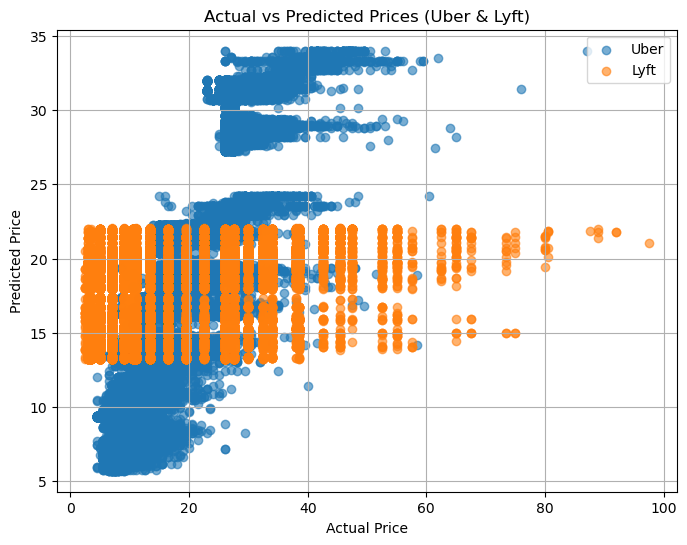

In [ ]:
# Actual vs Predicted Plot (Uber and Lyft in one plot)
import matplotlib.pyplot as plt

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['cab_type', 'destination', 'source', 'name', 'day_time']),
        ('num', StandardScaler(), ['temp'])
    ],
    remainder='passthrough'
)

# Define Linear Regression model
ln_reg = LinearRegression()

# Create pipeline for Uber
uber_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ln_reg)
])

# Fit and evaluate Linear Regression model for Uber
uber_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber = uber_pipeline.predict(X_test_uber)

mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Linear Regression Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber}")
print(f"Root Mean Squared Error: {rmse_uber}")
print(f"R^2 Score: {r2_uber}")

# Create pipeline for Lyft
lyft_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])
# Make predictions
y_pred_uber = uber_pipeline.predict(X_test_uber)
y_pred_lyft = lyft_pipeline.predict(X_test_lyft)

plt.figure(figsize=(8,6))
plt.scatter(y_test_uber, y_pred_uber, alpha=0.6, label="Uber")
plt.scatter(y_test_lyft, y_pred_lyft, alpha=0.6, label="Lyft")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Uber & Lyft)")
plt.legend()
plt.grid(True)
plt.show()


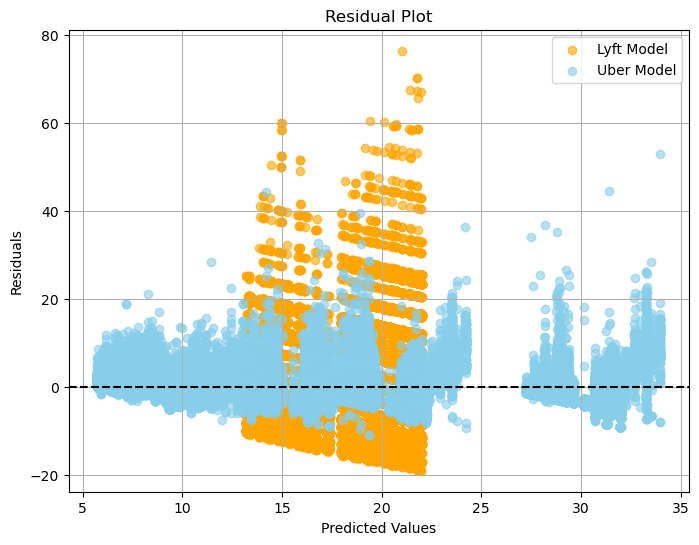

In [87]:
# Residuals (errors)
import matplotlib.pyplot as plt

lyft_residuals = y_test_lyft - y_pred_lyft
uber_residuals = y_test_uber - y_pred_uber

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lyft, lyft_residuals, label="Lyft Model", alpha=0.6, color = "orange")
plt.scatter(y_pred_uber, uber_residuals, label="Uber Model", alpha=0.6, color="skyblue")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid(True)
plt.show()


In [88]:
import pickle

models = {
    "lyft_model": lyft_pipeline,
    "uber_model": uber_pipeline
}

with open("rain_impact_cab_price.pkl", "wb") as f:
    pickle.dump(models, f)

with open("rain_impact_cab_price.pkl", "rb") as file:
    loaded_model=pickle.load(file)

loaded_model


{'lyft_model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['cab_type', 'destination',
                                                    'source', 'name',
                                                    'day_time']),
                                                  ('num', StandardScaler(),
                                                   ['temp'])])),
                 ('regressor', LinearRegression())]),
 'uber_model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['cab_type', 'destinati